# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2383 Жданов Антон Константинович и Ильин Павел Олегович. Вариант №13.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения
  

### 1. Дискретное время  
Дискретное время описывается индексом $ k $ или $ n $, который принимает только целые значения.  
Связь между индексом и реальным временем:
$
t = nT,
$
где $T$ — период дискретизации.  

### 2. Единичный скачок и прямоугольный импульс  
Единичный дискретный скачок:
$
\sigma_d(k) =
\begin{cases}
1, & k \ge 0,\\
0, & k < 0.
\end{cases}
$

Прямоугольный импульс можно получить на его основе как разность двух скачков:
$
s_1(k) = \sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{\text{imp}})),
$
что эквивалентно выражению:
$
s_1(k) =
\begin{cases}
U, & n_0 \le k \le n_0 + n_{\text{imp}} - 1,\\
0, & \text{иначе}.
\end{cases}
$

### 3. Линейная комбинация гармонических сигналов  
Дискретный гармонический сигнал:
$
x_i(k) = B_i \sin(\hat{\omega}_i k),
$
где $B_i$ — амплитуда, $\hat{\omega}_i$ — дискретная угловая частота.  

Линейная комбинация нескольких гармоник:
$
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k),
$
описывает суперпозицию колебаний с различными амплитудами и частотами.

### 4. Энергия и средняя мощность дискретного сигнала  
Энергия последовательности:
$
E = \sum_{k=0}^{N-1} |s(k)|^2,
$
Средняя мощность:
$
P = \frac{1}{N} \sum_{k=0}^{N-1} |s(k)|^2.
$

### 5. Экспоненциальная огибающая гармонического сигнала  
Затухающий гармонический сигнал описывается выражением:
$
s_3(k) = C \, a^k \cos(\hat{\omega}_0 k),
$
где $a$ — основание экспоненты, определяющее скорость затухания ($|a|<1$) или нарастания ($|a|>1$).

### 6. Периодическая последовательность  
Периодическая дискретная последовательность формируется повторением базового импульса через период $N_p$:
$
s_4(k) = \sum_{m=0}^{M-1} s_1(k - mN_p),
$
где $M$ — число периодов.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 13
N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
U = Nb % 20 + 1
n0 = 3 + Nb % 5
nimp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

print(f"N = {N}\na = {a}\nC = {C}\nw0 = {w0}\nU = {U}\nn0 = {n0}\nnimp = {nimp}\nB1 = {B1}\nB2 = {B2}\nB3 = {B3}\nw1 = {w1}\nw2 = {w2}\nw3 = {w3}\na1 = {a1}\na2 = {a2}\na3 = {a3}")

def graf_plot(x, y, title, xl, yl):
  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.title(title)
  plt.stem(x, y)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.show()

N = 33
a = -0.865
C = 4
w0 = 0.3490658503988659
U = 14
n0 = 6
nimp = 8
B1 = 4.5
B2 = 2.7
B3 = 5.2
w1 = 0.4487989505128276
w2 = 0.28559933214452665
w3 = 0.16534698176788384
a1 = -1.5
a2 = 3.7
a3 = 4.4


##1. **Смоделировать дискретный прямоугольный импульс:**

  $
   s_1(k) = \begin{cases}
   U, & n_0 \leq k < n_0 + n_{imp} \\
   0, & \text{иначе}
   \end{cases}
  $

   На основе дискретного единичного скачка $ \sigma_d(k) $ из л/р №1 с выводом графика на интервале времени
   $
   n \in [0, N-1]
  $
  
   Пояснить, как выполняется моделирование импульса.

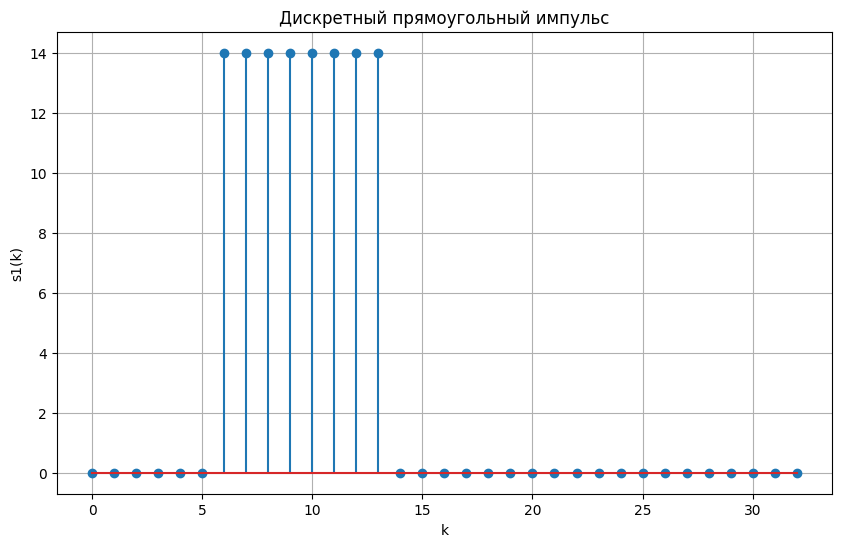

In [ ]:
s1 = np.zeros(N)
s1[n0:n0+nimp] = U
graf_plot(np.arange(N), s1, 'Дискретный прямоугольный импульс', 'k', 's1(k)')


Моделирование дискретного прямоугольного импульса выполняется с использованием **единичного скачка**.  
Сначала создаются два скачка:
- первый начинается в моменте $n_0$;  
- второй — в моменте $n_0 + n_{\text{imp}}$.  

Разность этих двух последовательностей формирует импульс заданной длительности:
$
s_1(k) = U \cdot [\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{\text{imp}}))].
$
Таким образом, значение сигнала равно $U$ на участке длиной $n_{\text{imp}}$ и нулю в остальное время.  

##2. **Смоделировать линейную комбинацию дискретных гармонических сигналов $ s_2(k) $:**

   $
   s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)
   $,
   где

   $
   x_i(k) = B_i \sin(\hat{\omega}_i k), \quad i = 1, 2, 3
   $

   С выводом графиков последовательностей $ x_i(k) $ и $ s_2(k) $ на интервале времени
   $
   n \in [0, 5N-1]
   $
   Вычислить среднее значение (идентификатор $ mean_{s2} $), энергию ($ E $) и среднюю мощность ($ P $) последовательности $ s_2(k) $.

   Пояснить:
   
   - а) Операции при моделировании линейной комбинации сигналов $ s_2(k) $;
   - б) Как определяют указанные характеристики.

Среднее s2: 1.568, Энергия: 57255.467, Средняя мощность: 347.003


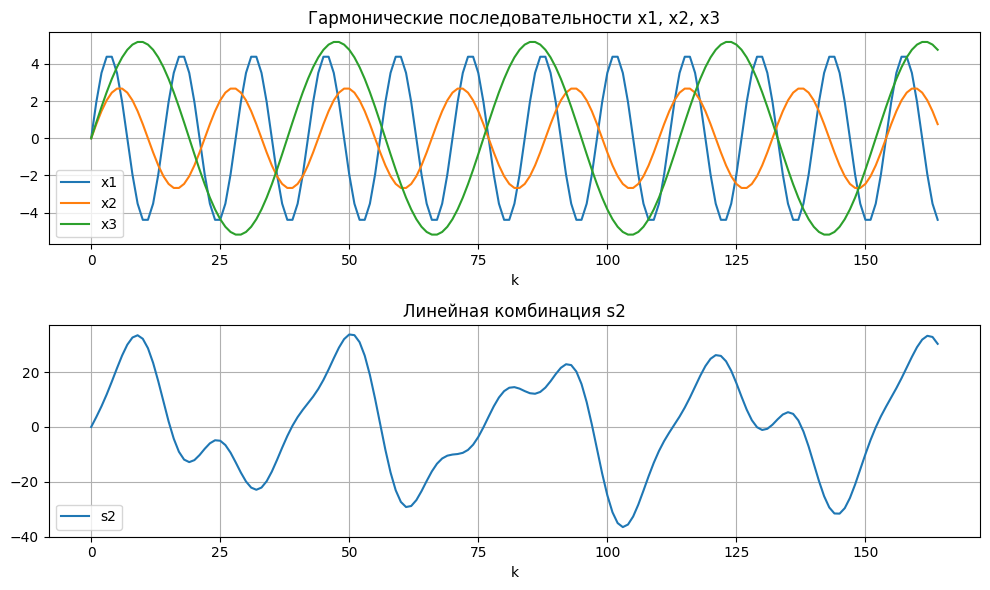

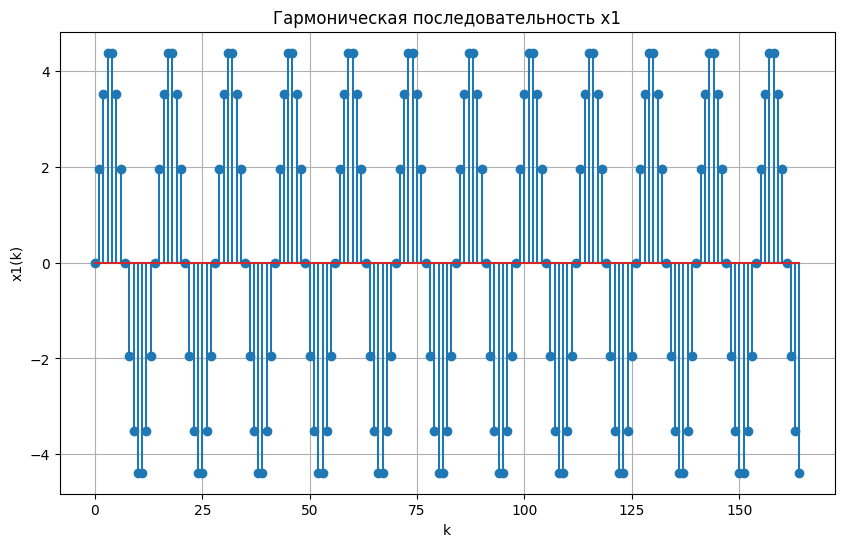

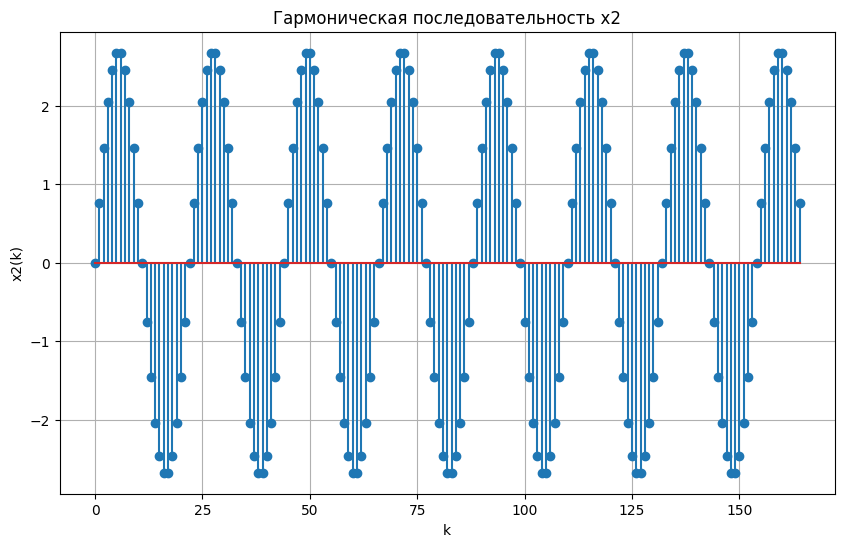

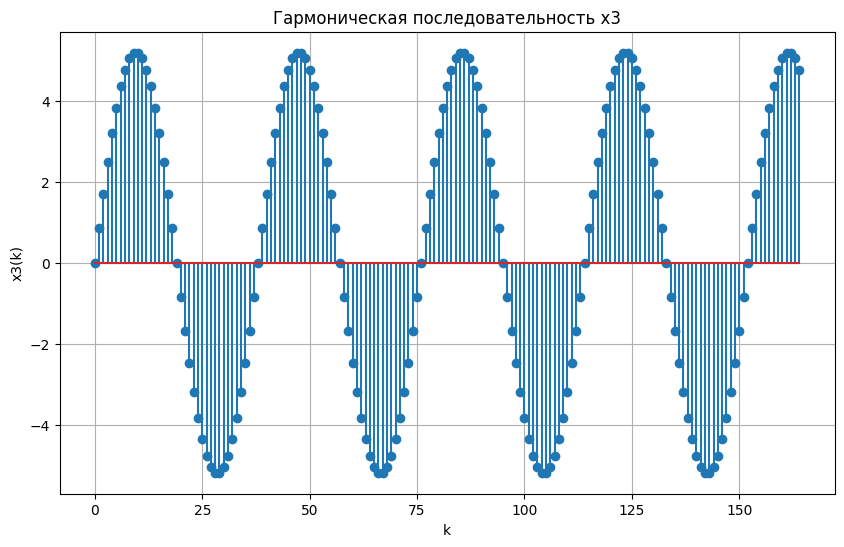

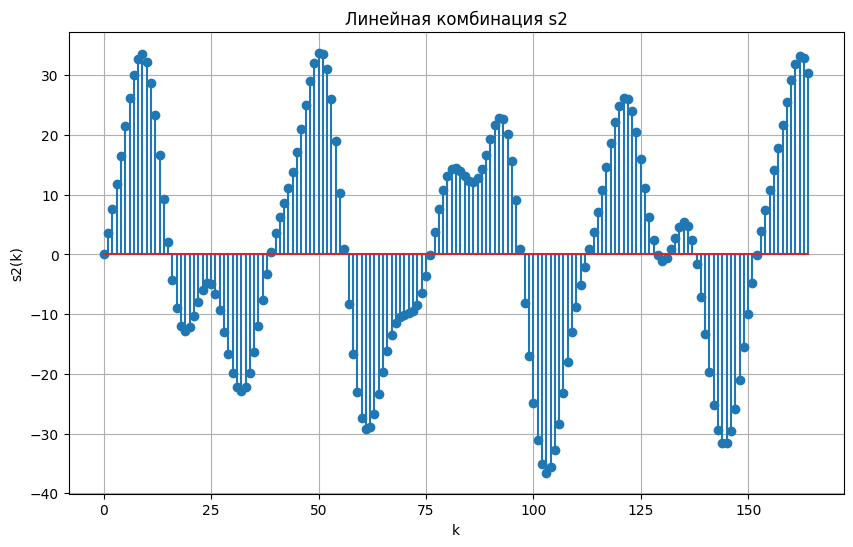

In [ ]:
n2 = np.arange(0, 5*N)
x1 = B1 * np.sin(w1 * n2)
x2 = B2 * np.sin(w2 * n2)
x3 = B3 * np.sin(w3 * n2)
s2 = a1*x1 + a2*x2 + a3*x3

signals = [ [x1, x2, x3], s2 ]
titles = ['Гармонические последовательности x1, x2, x3', 'Линейная комбинация s2']
labels = [ ['x1', 'x2', 'x3'], ['s2'] ]

mean_s2 = np.mean(s2)
E = np.sum(s2**2)
P = E / len(s2)
print(f"Среднее s2: {mean_s2:.3f}, Энергия: {E:.3f}, Средняя мощность: {P:.3f}")

plt.figure(figsize=(10,6))
for i in range(2):
    plt.subplot(2, 1, i+1)
    if i == 0:
        for sig, lab in zip(signals[i], labels[i]):
            plt.plot(n2, sig, label=lab)
        plt.legend()
    else:
        plt.plot(n2, signals[i], label=labels[i][0])
        plt.legend()
    plt.title(titles[i])
    plt.xlabel('k')
    plt.grid()
plt.tight_layout()
plt.show()

# Каждый сигнал отдельно
signals = [x1, x2, x3, s2]
titles = [
    'Гармоническая последовательность x1',
    'Гармоническая последовательность x2',
    'Гармоническая последовательность x3',
    'Линейная комбинация s2'
]
ylabels = ['x1(k)', 'x2(k)', 'x3(k)', 's2(k)']

for signal, title, ylabel in zip(signals, titles, ylabels):
    graf_plot(n2, signal, title, 'k', ylabel)

### Пояснения к моделированию линейной комбинации сигналов $ s_2(k) $

**a) Операции при моделировании линейной комбинации сигналов $ s_2(k) $:**

Линейная комбинация сигналов строится по формуле:
$
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)
$
где каждый гармонический сигнал задается как:
$
x_i(k) = B_i \sin(\hat{\omega}_i k), \quad i = 1,2,3
$

Моделирование состоит из следующих шагов:
- На заданном временном интервале вычисляются значения трёх гармонических сигналов $ x_1(k), x_2(k), x_3(k) $ с индивидуальными амплитудами и частотами.
- Для каждого момента времени $ k $ значения гармонических сигналов умножаются на соответствующие коэффициенты $ a_1, a_2, a_3 $.
- Результирующий сигнал $ s_2(k) $ получается как сумма этих взвешенных гармоник для каждого $ k $.

В программном коде это реализуется через создание массивов для $ x_1, x_2, x_3 $, далее формируется массив $ s_2 $ по формуле выше.

**b) Как определяют указанные характеристики:**

- **Среднее значение** $ \overline{s_2} $ рассчитывается как среднее арифметическое всех элементов массива $ s_2 $:
  $
  \overline{s_2} = \frac{1}{N} \sum_{k=0}^{N-1} s_2(k)
  $
  где $ N $ — длина сигнала.

- **Энергия сигнала** $ E $ определяется как сумма квадратов всех элементов:
  $
  E = \sum_{k=0}^{N-1} [s_2(k)]^2
  $

- **Средняя мощность** $ P $ рассчитывается как энергия, делённая на длину последовательности:
  $
  P = \frac{E}{N}
  $


##3. **Вывести график дискретного сигнала $ s_3(k) $, представляющего собой дискретный гармонический сигнал:**

   $
   s_3(k) = C \cos(\hat{\omega}_0 k)
   $

   с экспоненциальной огибающей $ |a|^k $ на интервале времени
   $
   n \in [0, N-1]
   $
   Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.


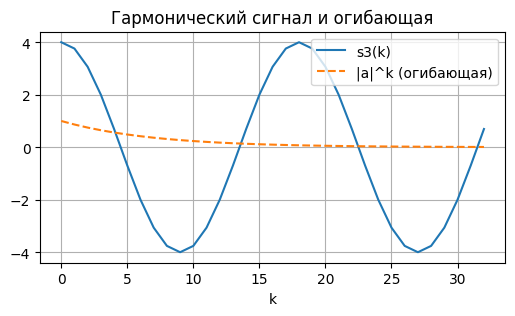

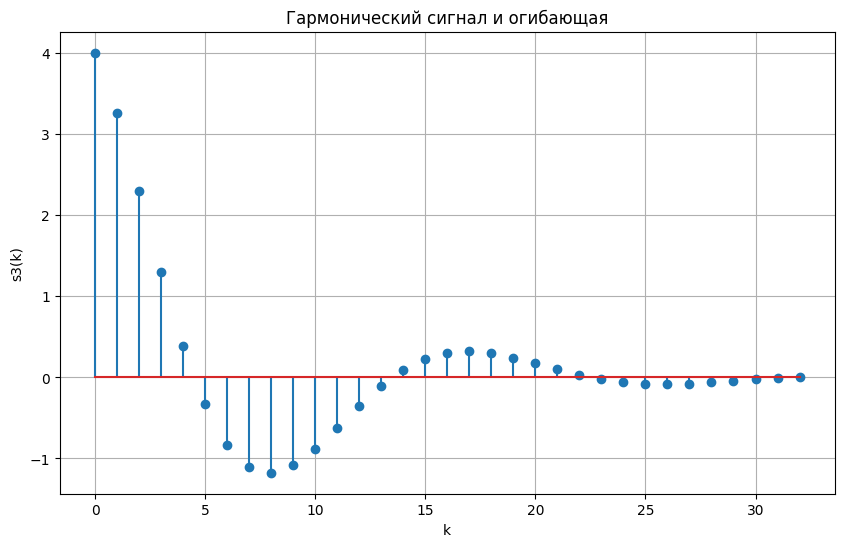

In [ ]:
k = np.arange(N)
s3 = C * np.cos(w0 * k)
envelope = np.abs(a)**k

plt.figure(figsize=(6,3))
plt.plot(k, s3, label='s3(k)')
plt.plot(k, envelope, '--', label='|a|^k (огибающая)')
plt.title('Гармонический сигнал и огибающая')
plt.xlabel('k')
plt.legend()
plt.grid()
plt.show()

graf_plot(k, s3*envelope, 'Гармонический сигнал и огибающая', 'k', 's3(k)')

### Аналитическая формула и пояснение к моделированию дискретного сигнала $ s_3(k) $

Аналитическая формула дискретного гармонического сигнала с экспоненциальной огибающей:

$
s_3(k) = C \cdot \cos(\hat{\omega}_0 k)
$

Экспоненциальная огибающая:
$
|a|^k
$

**Операции при моделировании:**

- На выбранном временном интервале $ k = 0, 1, ..., N-1 $ для каждого значения $ k $ вычисляется гармонический сигнал $ s_3(k) $ с амплитудой $ C $ и частотой $ \hat{\omega}_0 $.
- Дополнительно для каждой точки строится экспоненциальная огибающая $ |a|^k $, где $ a $ — основание экспоненты (модуль).
- В программном коде создаются два массива: один для значений гармонического сигнала, второй — для значений огибающей.

##4. **Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $ U $ и длительности $ n_{imp} $ с периодом, вдвое большим длительности импульса.**
   
   Пояснить операции при моделировании последовательности.

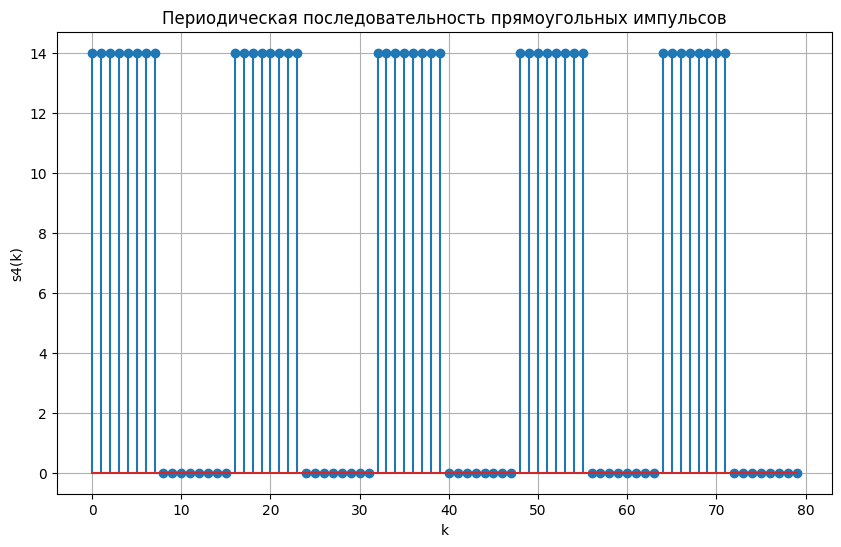

In [ ]:
period = 2 * nimp
count_periods = 5
k = np.arange(period * count_periods)
s4 = np.zeros_like(k)
for i in range(period * count_periods):
    if (k[i] % period) < nimp:
        s4[i] = U

graf_plot(k, s4, 'Периодическая последовательность прямоугольных импульсов', 'k', 's4(k)')

### Математические операции при моделировании периодической последовательности

Моделирование периодической последовательности дискретных прямоугольных импульсов состоит из следующих математических шагов:

- Пусть $ n_{imp} $ — длительность одного импульса, $ period = 2 \cdot n_{imp} $ — период повторения импульса, $ U $ — амплитуда.
- $ count_{periods} $ — количество отображаемых периодов.
- Формируется временной индекс $ k $ длиной $ period \cdot count_{periods} $:

  $
  k = 0, 1, 2, \ldots, period \cdot count_{periods} - 1
  $

- Для каждого момента времени $ k_i $ определяется положение внутри текущего периода:

  $
  \text{if } (k_i \bmod period) < n_{imp} \text{, то } s_4(k_i) = U
  $
  $
  \text{иначе } s_4(k_i) = 0
  $

- То есть, на каждом периоде первые $ n_{imp} $ отсчетов принимают значение амплитуды $ U $, остальные — 0, формируя прямоугольный импульс, повторяющийся с заданным периодом.


## Вывод

В ходе лабораторной работы были исследованы и смоделированы различные типы дискретных сигналов, включая дискретный прямоугольный импульс, линейную комбинацию гармонических сигналов, затухающую гармонику с экспоненциальной огибающей, а также периодическую последовательность прямоугольных импульсов. Для всех сигналов были построены графики, наглядно демонстрирующие их форму, динамику изменения и характерные особенности. Как результат, были приобретены практические навыки программного моделирования и анализа дискретных сигналов, а также закреплено понимание математических принципов, лежащих в основе их описания, формирования и взаимосвязей между различными типами сигналов.
